# Regression Metrics

This metrics are used to check how effecitently does the regression algroithm works!

Types are :

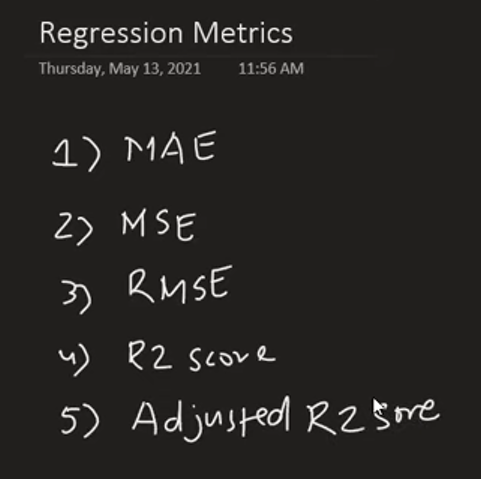

# 1. MAE

MAE (Mean Absolute Error) is a way to measure how wrong our predictions are in a simple way. It tells us, on average, how much our predicted values differ from the actual values.

Simple Example:

I have two col one as input and other as output

(|Yi - Y^i| + |Yi - Y^i| + |Yi - Y^i|) / n

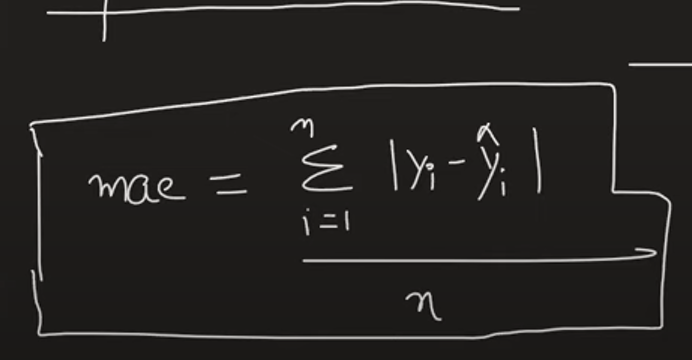

# Disadvantage

This is on absolute method so when we plot a graph it is lika V shape not differentiable at zero that's why MSE is used!

# 2. MSE

MSE (Mean Squared Error) is similar to MAE, but instead of just taking the absolute differences, it squares the errors. This gives more weight to bigger mistakes.

Formula :

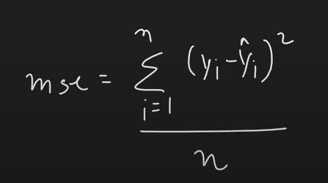

#Advantage

- Can be used as Loss Function

# Disadvantage

- Here we square the value of (Yi - y^i)^2 so have to find the square-root of output

- If there is a outlier then by squareing it will add more number so its not good at dealing outlier


# RMSE

This is nothing but square-root of MSE = sqrt(MSE)

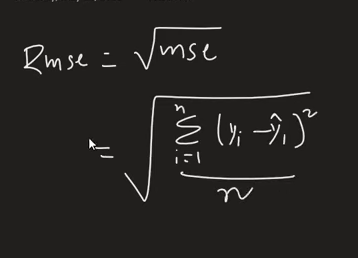

# Advantage

- The output is square root of final answer so this will be actual value not like MSE

# Disadvantage

- Not good at outlier

# R² Score (R-Squared)

Simple Explanation

The R² score tells us how well a model's predictions match the actual values. It measures accuracy and gives a value between 0 and 1 (sometimes negative if the model is very bad).

- R² = 1 → Perfect predictions! 🎯
- R² = 0 → Model is no better than guessing the average. 🤷
- R² < 0 → Model is worse than just using the average. 😬

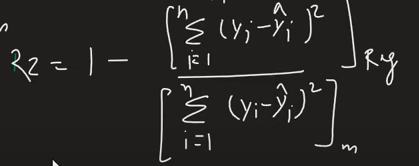

Example

Let’s say we are predicting the price of a house based on its size.

 Step 1: Find the average of actual prices

  Actual house prices: 100K, 150K, 200K, 250K

 👉 Mean (Average) price = (100 + 150 + 200 + 250) / 4 = 175K

Step 2: Calculate Total Variation in Actual Data Mean (denominator):

- - (100 - 175)² = 5625
- - (150 - 175)² = 625
- - (200 - 175)² = 625
- - (250 - 175)² = 5625

👉 TSS = 5625 + 625 + 625 + 5625 = 12,500

Step 3: Calculate Model's Errors (Numerator)

Suppose the model predicts these prices: 110K, 160K, 190K, 240K
Errors = (Actual - Predicted)²

- (100 - 110)² = 100
- (150 - 160)² = 100
- (200 - 190)² = 100
- (250 - 240)² = 100

👉 RSS = 100 + 100 + 100 + 100 = 400

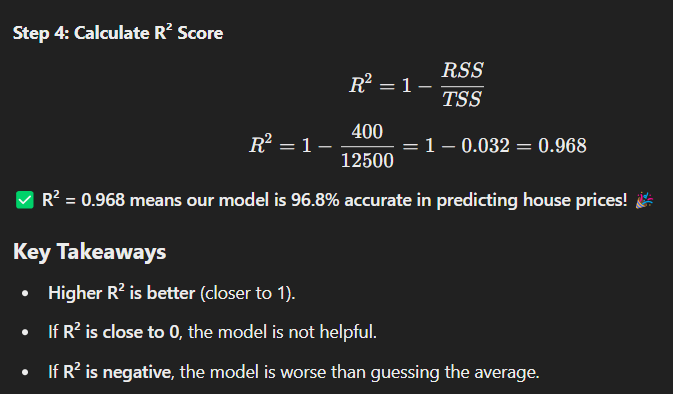

# Disadvantage of R² Score

One major problem with R² is that it never decreases when we add more features (columns) to the model, even if those features are useless (irrelevant).

**Why is this a problem?**

- If we add a random column that has nothing to do with the target, the R² score may increase or stay the same instead of going down.

- This makes us think the model is getting better, but in reality, it's just overfitting (learning unnecessary details).


# Adjusted R2 Score

Formula :

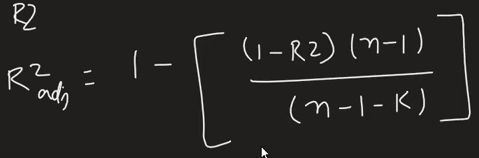

- R2 -> R2 score
- n -> No. of rows
- k -> No. of independent columns [inputs columns ]


# Code Example

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [35]:
df = pd.read_csv('/content/placement (1).csv')


In [36]:
df.head()


,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


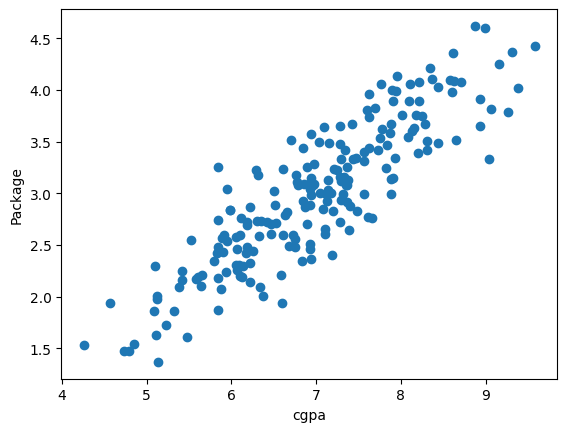

In [37]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('cgpa')
plt.ylabel('Package')
plt.show()

In [38]:
X = df.iloc[:,0:1]
Y = df.iloc[:,1:]

In [39]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state=2)

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
lr = LinearRegression()

In [42]:
lr.fit(X_train,Y_train)

LinearRegression()

Text(0, 0.5, 'Package(in lpa)')

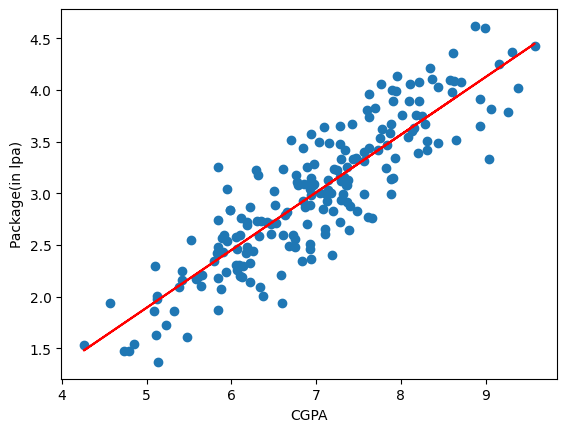

In [43]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [44]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [45]:
Y_pred = lr.predict(X_test)

In [46]:
Y_test.values

array([[4.1 ],
       [3.49],
       [2.08],
       [2.33],
       [1.94],
       [1.48],
       [1.86],
       [3.09],
       [4.21],
       [2.87],
       [3.65],
       [4.  ],
       [2.89],
       [2.6 ],
       [2.99],
       [3.25],
       [1.86],
       [3.67],
       [2.37],
       [3.42],
       [2.48],
       [3.65],
       [2.6 ],
       [2.83],
       [4.08],
       [2.56],
       [3.58],
       [3.81],
       [4.09],
       [2.01],
       [3.63],
       [2.92],
       [3.51],
       [1.94],
       [2.21],
       [3.34],
       [3.34],
       [3.23],
       [2.01],
       [2.61]])

In [47]:
print("MAE",mean_absolute_error(Y_test,Y_pred))

MAE 0.2884710931878175


In [48]:
print("MSE",mean_squared_error(Y_test,Y_pred))

MSE 0.12129235313495527


In [49]:

print("RMSE",np.sqrt(mean_squared_error(Y_test,Y_pred)))

RMSE 0.34827051717731616


In [50]:
print("MSE",r2_score(Y_test,Y_pred))
r2 = r2_score(Y_test,Y_pred)

MSE 0.780730147510384


In [51]:
# Adjusted R2 score
X_test.shape

(40, 1)

In [52]:
1 - ((1-r2)*(40-1)/(40-1-1))

0.7749598882343415

In [53]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.637805,3.26
1,5.12,0.973659,1.98
2,7.82,0.528623,3.25
3,7.42,0.007323,3.67
4,6.94,0.381029,3.57


Text(0, 0.5, 'Package(in lpa)')

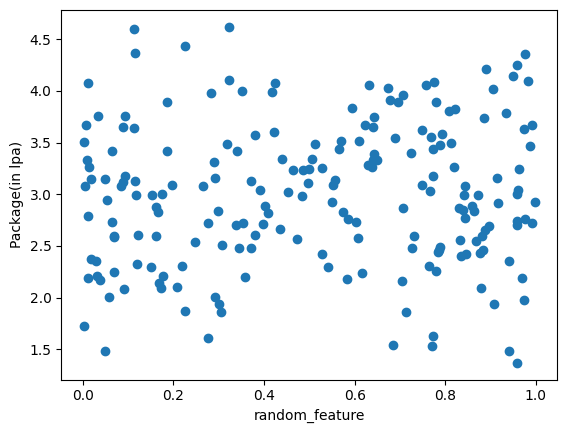

In [54]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')